In [2]:
import numpy as np
from PIL import Image

In [7]:
def process_grayscale_image(image_path, target_size=(960, 960)):
    # Step 1: Load the image and convert to grayscale
    image = Image.open(image_path).convert("L")  # "L" mode converts the image to grayscale
    
    # Step 2: Resize the image
    image_resized = image.resize(target_size)
    
    # Step 3: Convert the image to a numpy matrix
    image_matrix = np.array(image_resized)
    
    # Step 4: Vectorize the image
    image_vector = image_matrix.flatten()
    
    return image_matrix, image_vector

# Example usage
image_path = 'cat.png'  # Replace with your black-and-white image path
matrix, vector = process_grayscale_image(image_path)

print(f"Grayscale Image Matrix Shape: {matrix.shape}")  # e.g., (960, 960)
print(f"Grayscale Image Vector Length: {len(vector)}")  # e.g., 960*960


Grayscale Image Matrix Shape: (960, 960)
Grayscale Image Vector Length: 921600


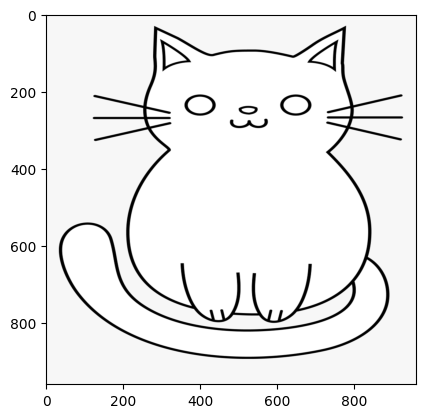

In [14]:
#invert matrix
inverse = np.invert(matrix)

#plot matrix as image
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.show()


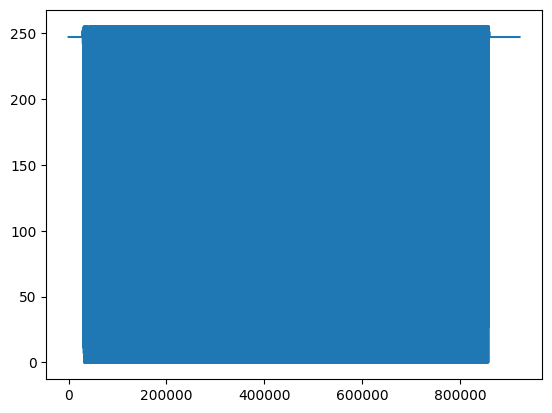

In [15]:
vector

#plot vector of the cat
plt.plot(vector)    
plt.show()
